In [10]:
import os
import sys

sys.path.append('../')

from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from rdkit.Chem import AllChem


from utils.constants import HOME_DIR, DATA_DIR

In [2]:
data_path = os.path.join(DATA_DIR, 'clean_data.csv')
data = pd.read_csv(data_path)

In [3]:
data

,Chemical_Name,Canonical_QSARr,LD50_mgkg
0,1-Chloro-4-nitrobenzene,[O-][N+](=O)C1C=CC(Cl)=CC=1,460.00
1,4-Nitroaniline,NC1=CC=C(C=C1)[N+]([O-])=O,750.00
2,4-Nitrophenol,[O-][N+](=O)C1C=CC(O)=CC=1,170.00
3,4-Nitrobenzyl chloride,[O-][N+](=O)C1C=CC(CCl)=CC=1,1809.00
4,p-Nitroanisole,COC1C=CC(=CC=1)[N+]([O-])=O,2300.00
...,...,...,...
5301,"Phosphonothioic acid, O,O-diethyl ester",CCOP(=S)OCC,200.00
5302,"Phosphonodithious acid, methyl-, dipropyl ester",CP(SCCC)SCCC,2.24
5303,2-Hydroxypropyl acrylate,CC(O)COC(=O)C=C,250.00
5304,Chlormequat chloride,C[N+](C)(C)CCCl,600.00


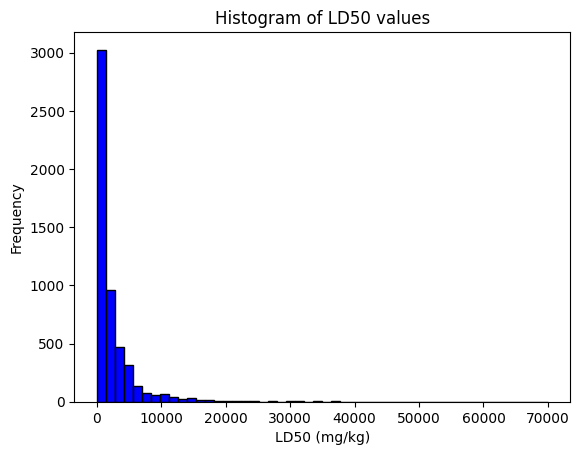

In [ ]:
LD50 = data['LD50_mgkg']

# Plot the histogram of the LD50 values
plt.hist(np.log(LD50), bins=50, color='blue', edgecolor='black')
plt.xlabel('LD50 (mg/kg)')
plt.ylabel('Frequency')
plt.title('Histogram of LD50 values')
plt.show()

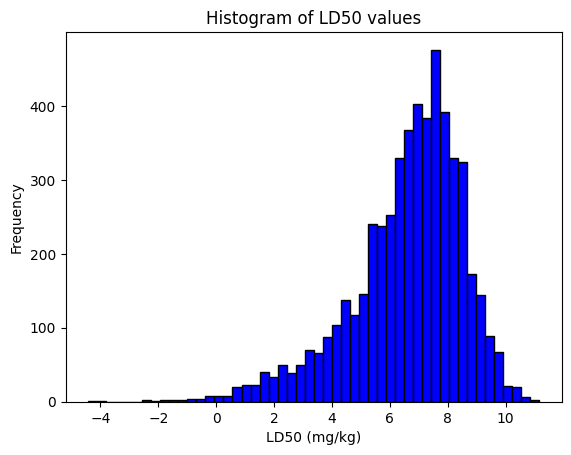

In [24]:
ln_LD50 = np.log(data['LD50_mgkg'])

# Plot the histogram of the LD50 values
plt.hist(ln_LD50, bins=50, color='blue', edgecolor='black')
plt.xlabel('LD50 (mg/kg)')
plt.ylabel('Frequency')
plt.title('Histogram of LD50 values')
plt.show()

In [ ]:
Canonical_QSARr = data['Canonical_QSARr']
atom_counts = defaultdict(int)

mols = [AllChem.AddHs(AllChem.MolFromSmiles(smile)) for smile in Canonical_QSARr]

for mol in mols:
    for atom in mol.GetAtoms():
        atom_counts[atom.GetSymbol()] += 1

In [17]:
atom_counts.keys()

dict_keys(['O', 'N', 'C', 'Cl', 'H', 'S', 'B', 'Si', 'P', 'F', 'Br', 'Se', 'I'])

In [18]:
# Turn atom names to atomic numbers
atom_numbers = {atom: AllChem.GetPeriodicTable().GetAtomicNumber(atom) for atom in atom_counts.keys()}

In [23]:
nums = list(atom_numbers.values())
nums.sort()
nums

[1, 5, 6, 7, 8, 9, 14, 15, 16, 17, 34, 35, 53]